<a href="https://colab.research.google.com/github/vinodthadi29/nlp-sentiment-analysis/blob/main/Sentiment_Analysis_of_Restaurant_Reviews_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [2]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t')

In [3]:
df.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [4]:
df.shape

(1000, 2)

In [5]:
df.columns

Index(['Review', 'Liked'], dtype='object')

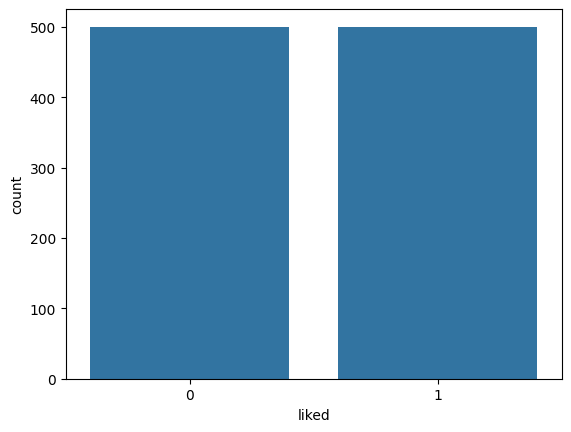

In [6]:

df.columns = [x.lower() for x in df.columns]
sns.countplot(x='liked', data=df)
plt.show()

In [7]:
X = df['review']
y = df['liked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train

,review
29,The worst was the salmon sashimi.
535,An excellent new restaurant by an experienced ...
695,Went for lunch - service was slow.
557,I think this restaurant suffers from not tryin...
836,Just had lunch here and had a great experience.
...,...
106,"The food was delicious, our bartender was atte..."
270,The Veggitarian platter is out of this world!
860,"This place is pretty good, nice little vibe in..."
435,It was a huge awkward 1.5lb piece of cow that ...


In [9]:
X_test

,review
521,If you haven't gone here GO NOW!
737,Try them in the airport to experience some tas...
740,The restaurant is very clean and has a family ...
660,"I personally love the hummus, pita, baklava, f..."
411,"Come hungry, leave happy and stuffed!"
...,...
408,Service was fantastic.
332,"We had fantastic service, and were pleased by ..."
208,Must have been an off night at this place.
613,"Sorry, I will not be getting food from here an..."


In [10]:
y_train

,liked
29,0
535,1
695,0
557,0
836,1
...,...
106,1
270,1
860,1
435,0


In [11]:
y_test

,liked
521,1
737,1
740,1
660,1
411,1
...,...
408,1
332,1
208,0
613,0


In [12]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [13]:
X_train

<800x1794 sparse matrix of type '<class 'numpy.int64'>'
	with 7863 stored elements in Compressed Sparse Row format>

In [14]:
X_test

<200x1794 sparse matrix of type '<class 'numpy.int64'>'
	with 1663 stored elements in Compressed Sparse Row format>

In [15]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [17]:
y_pred_svc = svc_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

In [18]:
y_pred_svc

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1])

In [19]:
y_pred_nb

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1])

In [20]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        96
           1       0.84      0.73      0.78       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200



In [21]:
svc_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC(kernel='linear'))
])

nb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc_pipeline.fit(X_train, y_train)
y_pred = svc_pipeline.predict(X_test)

In [23]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_pipeline.fit(X_train, y_train)
y_pred = nb_pipeline.predict(X_test)

In [25]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1])

In [26]:
best_model = nb_pipeline
joblib.dump(best_model, 'sentiment_model.pkl')

['sentiment_model.pkl']

In [27]:
loaded_model = joblib.load('sentiment_model.pkl')

In [28]:
if isinstance(y, pd.Series):
    y = y.to_numpy()
loaded_model.fit(X, y)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [29]:

new_review = "The food was delicious and the service was excellent!"
prediction = loaded_model.predict([new_review])
print("prediction:", prediction)

prediction: [1]


In [30]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [35]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# --- Load Model & Dataset ---
loaded_model = joblib.load('sentiment_model.pkl')
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')
df.columns = [x.lower() for x in df.columns]  # Standardize column names

# --- Model Accuracy ---
X = df['review']
y = df['liked']
y_pred = loaded_model.predict(X)
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

# --- AWS-Optimized Page Config ---
st.set_page_config(
    page_title="Restaurant Review Sentiment Analyzer",
    page_icon="🍽️",
    layout="wide",
    initial_sidebar_state="expanded"
)

# --- Custom Styling ---
st.markdown("""
    <style>
    .main {
        background-color: #FFFFFF;
        padding: 20px;
        border-radius: 10px;
    }
    .stTextArea textarea {
        font-size: 16px !important;
        color: #000000 !important; /* Black Text for Contrast */
        background-color: #FAFAFA !important;
    }
    .stButton>button {
        background-color: #ff6b6b;
        color: white;
        font-size: 18px;
        padding: 10px 20px;
        border-radius: 10px;
    }
    .stButton>button:hover {
        background-color: #ff3b3b;
    }
    .metric-box {
        text-align: center;
        font-size: 18px;
        font-weight: bold;
        color: #333;
    }
    </style>
""", unsafe_allow_html=True)

# --- Header Section ---
st.markdown("<h1 style='text-align: center; color: #FF5733;'>🍽️ Restaurant Review Sentiment Analyzer</h1>", unsafe_allow_html=True)
st.write("Enter your restaurant review below and let our AI analyze the sentiment!")

# --- Sidebar: Model Performance Metrics ---
st.sidebar.header("📊 Model Performance Metrics")
st.sidebar.metric("🔍 Accuracy", f"{accuracy:.2%}")

fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=ax)
ax.set_title("Confusion Matrix")
st.sidebar.pyplot(fig)

# --- Sentiment Distribution Chart ---
st.sidebar.header("📝 Sentiment Distribution")
fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(x='liked', data=df, palette='coolwarm', ax=ax)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_title("Distribution of Reviews")
st.sidebar.pyplot(fig)

# --- User Input Section ---
review_input = st.text_area("✍️ **Your Restaurant Review:**", height=150, placeholder="Type your review here...")

# --- Sentiment Prediction Function ---
def predict_sentiment(review):
    if review:
        prediction = loaded_model.predict([review])
        return prediction[0]
    return None

# --- Analyze Button ---
if st.button("🔍 Analyze Review"):
    sentiment_result = predict_sentiment(review_input)

    if sentiment_result is not None:
        st.markdown("---")
        st.subheader("🔎 **Sentiment Analysis Result:**")

        if sentiment_result == 1:
            st.success("✅ This is a **positive** review! 😊 We appreciate your kind words.")
        else:
            st.error("❌ This is a **negative** review. 😔 We're sorry to hear about your experience.")

        # --- Restaurant Recommendations ---
        st.markdown("---")
        st.subheader("🍽️ **Recommended Restaurants**")

        if sentiment_result == 1:
            st.write("🎉 Based on your **positive** feedback, here are some highly-rated restaurants you might enjoy:")
            st.info("✅ The Gourmet House\n✅ Italian Delight\n✅ Urban Bistro")
        else:
            st.write("🔄 Since you didn't enjoy your experience, here are some alternative restaurants to try:")
            st.info("🔄 Fresh Bites\n🔄 Comfort Cuisine\n🔄 Tasty Treats")

    else:
        st.warning("⚠️ Please enter a review to analyze.")

# --- Footer ---
st.markdown("---")
st.markdown("<h4 style='text-align: center;'>📧 Contact us: vinodthadi29@gmail.com | 📞 9502738939</h4>", unsafe_allow_html=True)

Overwriting app.py


In [32]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 5s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

In [33]:
!wget -q -O- ipv4.icanhazip.com

34.105.92.67


In [36]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.105.92.67:8501

⠼⠴your url is: https://evil-sides-hear.loca.lt
/content/app.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='liked', data=df, palette='coolwarm', ax=ax)
/content/app.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative', 'Positive'])
/content/app.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='liked', data=df, palette='coolwarm', ax=ax)
/content/app.py:78: UserWarning: set_ticklabels(